Epoch 0: learning_rate=0.0990, radius=4.9500
Epoch 50: learning_rate=0.0599, radius=2.9948
Epoch 100: learning_rate=0.0362, radius=1.8119
Epoch 150: learning_rate=0.0219, radius=1.0962

Final Weights Shape: (10, 10, 3)
Sample of final weights (first 3 neurons):
[0.07878768 0.14341182 0.10138729] [0.18796705 0.31155877 0.16967545] [0.32353204 0.19572283 0.20657602]


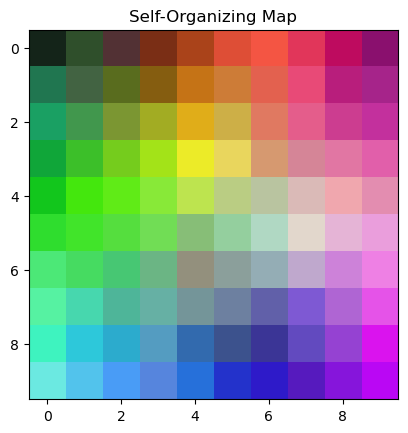

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class SOM:
    def __init__(self, input_dim, grid_size, lr=0.1, radius=None, epochs=200):
        self.input_dim = input_dim
        self.grid_size = grid_size
        self.lr = lr
        self.epochs = epochs
        self.radius = radius if radius else max(grid_size)/2
        self.weights = np.random.rand(grid_size[0], grid_size[1], input_dim)

    def find_bmu(self, sample):
        distances = np.linalg.norm(self.weights - sample, axis=2)
        return np.unravel_index(np.argmin(distances), distances.shape)

    def update_weights(self, sample, bmu):
        for i in range(self.grid_size[0]):
            for j in range(self.grid_size[1]):
                dist = np.linalg.norm(np.array([i,j]) - np.array(bmu))
                if dist <= self.radius:
                    influence = np.exp(-dist**2 / (2*(self.radius**2)))
                    self.weights[i,j] += self.lr * influence * (sample - self.weights[i,j])

    def train(self, data):
        for epoch in range(self.epochs):
            for sample in data:
                bmu = self.find_bmu(sample)
                self.update_weights(sample, bmu)
            # decay learning rate and radius
            self.lr *= 0.99
            self.radius *= 0.99
            # Print progress every 50 epochs
            if epoch % 50 == 0:
                print(f"Epoch {epoch}: learning_rate={self.lr:.4f}, radius={self.radius:.4f}")

    def visualize(self):
        plt.imshow(self.weights.reshape(self.grid_size[0], self.grid_size[1], self.input_dim))
        plt.title("Self-Organizing Map")
        plt.show()

# Example usage
data = np.random.rand(100, 3)   # 100 samples, 3 features
som = SOM(input_dim=3, grid_size=(10,10))
som.train(data)

print("\nFinal Weights Shape:", som.weights.shape)
print("Sample of final weights (first 3 neurons):")
print(som.weights[0,0], som.weights[0,1], som.weights[0,2])

som.visualize()

